# This program optimizes a stock portfolio automatically

In [1]:
# Import the python libraries 
import pandas as pd
import numpy as np
import requests
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split

## Real State

In [2]:
# Get the Real State Stock data using yahoo source
df = web.DataReader(['ARE', 'AMT', 'AIV', 'AVB', 'BXP', 'CBRE', 'CCI', 'DLR', 'DRE', 'EQIX', 'EQR', 'ESS', 'EXR', 'FRT', 'PEAK', 'HST', 'IRM', 'KIM', 'MAA', 'PLD', 'PSA', 'O', 'REG', 'SBAC', 'SPG' 'SLG', 'UDR', 'VTR', 'VNO', 'WELL', 'WY'], data_source='yahoo', start='2016-01-01', end='2021-01-15')
df
# Rename Adj Close to Adj_Close
df = df.rename(columns={
    "Adj Close": "NYSE_Adj_Close"
})
df

Attributes NYSE_Adj_Close                                                \
Symbols               ARE         AMT       AIV         AVB         BXP   
Date                                                                      
2016-01-04      77.068512   87.649292  3.343637  152.965378  107.119522   
2016-01-05      78.132286   89.380524  3.428810  156.486481  109.758713   
2016-01-06      77.604713   89.063278  3.390018  155.318420  109.741447   
2016-01-07      75.036072   86.842606  3.370622  154.607468  107.792252   
2016-01-08      74.006874   85.410469  3.306533  151.865036  104.773590   
...                   ...         ...       ...         ...         ...   
2021-01-11     164.770004  214.919998  4.820000  157.380005   89.589996   
2021-01-12     164.009995  214.910004  4.780000  157.380005   91.459999   
2021-01-13     168.899994  216.460007  4.880000  159.190002   92.089996   
2021-01-14     167.669998  214.990005  4.920000  160.490005   94.550003   
2021-01-15     168.369995  219.889999  4.890000  164.000000   95.150002   

Attributes                                                            ...  \
Symbols          CBRE         CCI         DLR        DRE        EQIX  ...   
Date                                                                  ...   
2016-01-04  34.090000   71.082344   63.949455  17.590481  268.626740  ...   
2016-01-05  34.389999   72.539116   64.024963  17.826033  275.277191  ...   
2016-01-06  32.910000   71.931442   64.620842  17.573656  280.466766  ...   
2016-01-07  31.070000   70.141708   64.436203  17.077320  275.168304  ...   
2016-01-08  30.719999   69.159416   64.654419  16.715590  281.065674  ...   
...               ...         ...         ...        ...         ...  ...   
2021-01-11  62.240002  153.059998  131.270004  38.340000  682.390015  ...   
2021-01-12  63.040001  150.460007  131.509995  38.160000  676.530029  ...   
2021-01-13  61.810001  152.690002  133.149994  38.639999  690.119995  ...   
2021-01-14  62.259998  154.759995  133.449997  38.580002  689.669983  ...   
2021-01-15  63.520000  157.250000  136.479996  38.900002  707.760010  ...   

Attributes     Volume                                                          \
Symbols           PSA           O        REG       SBAC        UDR        VTR   
Date                                                                            
2016-01-04  1220900.0   2030700.0   553400.0  1191200.0  1655700.0  2820900.0   
2016-01-05   776000.0   1944200.0   452700.0   906900.0  1052300.0  2014300.0   
2016-01-06   589800.0   1769000.0   572200.0   504000.0  1234500.0  2960300.0   
2016-01-07   633700.0   2146000.0   897900.0   725100.0  1973900.0  2580500.0   
2016-01-08   600600.0   1581900.0   717100.0  1005000.0  2275100.0  3097700.0   
...               ...         ...        ...        ...        ...        ...   
2021-01-11   738900.0   2556000.0  1206400.0   961100.0  1485600.0  1513000.0   
2021-01-12   690200.0  11817100.0   747700.0   691900.0  2524600.0  2159100.0   
2021-01-13   785400.0   4278400.0  1310000.0   729700.0  1291600.0  1203100.0   
2021-01-14   773100.0   2916500.0  1060400.0   531800.0  2074900.0  1017500.0   
2021-01-15  1864200.0   3256500.0  1592000.0   538800.0  1972200.0  2581800.0   

Attributes                                          
Symbols           VNO       WELL         WY SPGSLG  
Date                                                
2016-01-04   838562.0  2434100.0  3556800.0    NaN  
2016-01-05   706574.0  3346500.0  2722800.0    NaN  
2016-01-06   964860.0  2591900.0  4843200.0    NaN  
2016-01-07  1397563.0  4418400.0  4917400.0    NaN  
2016-01-08   839428.0  2299100.0  5022600.0    NaN  
...               ...        ...        ...    ...  
2021-01-11  2061400.0  1748200.0  4554100.0    NaN  
2021-01-12  1372200.0  2285700.0  3958200.0    NaN  
2021-01-13  1360400.0  1596900.0  4096600.0    NaN  
2021-01-14  2163100.0  1319700.0  3286800.0    NaN  
2021-01-15  2547100.0  2649000.0  2511500.0   

In [3]:
df = df.copy()

In [4]:
# Pick all Stocks NYSE_Adj_Close
NYSE_Close_df = df["NYSE_Adj_Close"]
NYSE_Close_df

Symbols,ARE,AMT,AIV,AVB,BXP,CBRE,CCI,DLR,DRE,EQIX,...,PSA,O,REG,SBAC,UDR,VTR,VNO,WELL,WY,SPGSLG
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,77.068512,87.649292,3.343637,152.965378,107.119522,34.090000,71.082344,63.949455,17.590481,268.626740,...,203.908585,41.298069,56.187164,104.787628,30.995798,43.688343,63.767166,53.365490,24.703295,NaN
2016-01-05,78.132286,89.380524,3.428810,156.486481,109.758713,34.389999,72.539116,64.024963,17.826033,275.277191,...,209.666153,42.193741,57.285286,106.164856,31.389849,44.458313,64.609413,54.692017,24.761265,NaN
2016-01-06,77.604713,89.063278,3.390018,155.318420,109.741447,32.910000,71.931442,64.620842,17.573656,280.466766,...,209.999908,42.443886,57.618053,105.193855,31.163475,44.050220,64.304909,54.574982,24.214693,NaN
2016-01-07,75.036072,86.842606,3.370622,154.607468,107.792252,31.070000,70.141708,64.436203,17.077320,275.168304,...,207.813721,41.709599,57.085629,101.646767,30.807007,43.280251,63.669952,53.014355,23.320307,NaN
2016-01-08,74.006874,85.410469,3.306533,151.865036,104.773590,30.719999,69.159416,64.654419,16.715590,281.065674,...,206.295044,41.289993,56.594807,100.705498,30.401541,43.318752,62.296387,53.131386,23.104990,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,164.770004,214.919998,4.820000,157.380005,89.589996,62.240002,153.059998,131.270004,38.340000,682.390015,...,221.250000,59.419998,44.020000,260.359985,37.049999,46.200001,35.270000,61.180000,33.099998,NaN
2021-01-12,164.009995,214.910004,4.780000,157.380005,91.459999,63.040001,150.460007,131.509995,38.160000,676.530029,...,222.240005,57.810001,44.750000,261.209991,37.529999,46.700001,35.910000,61.090000,32.709999,NaN
2021-01-13,168.899994,216.460007,4.880000,159.190002,92.089996,61.810001,152.690002,133.149994,38.639999,690.119995,...,224.789993,57.779999,46.369999,265.420013,38.250000,48.099998,36.590000,63.810001,32.160000,NaN


In [5]:
#NYSE_Close_df.to_csv(index=False)

In [6]:
#compression_opts = dict(method='zip',
#                        archive_name='out2.csv')  
#NYSE_Close_df.to_csv('out.zip', index=False,
#          compression=compression_opts)

In [7]:
real_state_stocks = pd.read_csv('..//Resources/Real_State_Stocks_Update.csv')
# Reset the date as the index
real_state_stocks = real_state_stocks.set_index(pd.DatetimeIndex(real_state_stocks['Date'].values))
#Remove the Date column
real_state_stocks.drop(columns=['Date'], axis=1, inplace=True)
real_state_stocks

,ARE,AMT,AIV,AVB,BXP,CBRE,CCI,DLR,DRE,EQIX,...,PLD,PSA,O,REG,SBAC,UDR,VTR,VNO,WELL,WY
2016-01-04,77.07,87.65,3.34,152.97,107.12,34.09,71.08,63.95,17.59,268.63,...,36.18,203.91,41.30,56.19,104.79,31.00,43.69,63.77,53.37,24.70
2016-01-05,78.13,89.38,3.43,156.49,109.76,34.39,72.54,64.02,17.83,275.28,...,36.94,209.67,42.19,57.29,106.16,31.39,44.46,64.61,54.69,24.76
2016-01-06,77.60,89.06,3.39,155.32,109.74,32.91,71.93,64.62,17.57,280.47,...,36.74,210.00,42.44,57.62,105.19,31.16,44.05,64.30,54.57,24.21
2016-01-07,75.04,86.84,3.37,154.61,107.79,31.07,70.14,64.44,17.08,275.17,...,35.78,207.81,41.71,57.09,101.65,30.81,43.28,63.67,53.01,23.32
2016-01-08,74.01,85.41,3.31,151.87,104.77,30.72,69.16,64.65,16.72,281.07,...,35.46,206.30,41.29,56.59,100.71,30.40,43.32,62.30,53.13,23.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,164.77,214.92,4.82,157.38,89.59,62.24,153.06,131.27,38.34,682.39,...,94.66,221.25,59.42,44.02,260.36,37.05,46.20,35.27,61.18,33.10
2021-01-12,164.01,214.91,4.78,157.38,91.46,63.04,150.46,131.51,38.16,676.53,...,94.71,222.24,57.81,44.75,261.21,37.53,46.70,35.91,61.09,32.71
2021-01-13,168.90,216.46,4.88,159.19,92.09,61.81,152.69,133.15,38.64,690.12,...,95.41,224.79,57.78,46.37,265.42,38.25,48.10,36.59,63.81,32.16
2021-01-14,167.67,214.99,4.92,160.49,94.55,62.26,154.76,133.45,38.58,689.67,...,95.50,221.23,57.83,47.06,264.12,38.73,48.47,37.92,63.56,32.67


In [8]:
# Get the assets /tickers
assets = real_state_stocks.columns

In [9]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [10]:
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu = expected_returns.mean_historical_return(real_state_stocks)
S = risk_models.sample_cov(real_state_stocks)

In [11]:
# Optimize for the maximal Shrpe ratio 
ef = EfficientFrontier(mu, S) # Creates the Efficient Frontier Object
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ARE', 0.0), ('AMT', 0.13039), ('AIV', 0.0), ('AVB', 0.0), ('BXP', 0.0), ('CBRE', 0.0), ('CCI', 0.0), ('DLR', 0.0), ('DRE', 0.0), ('EQIX', 0.33022), ('EQR', 0.0), ('ESS', 0.0), ('EXR', 0.0), ('FRT', 0.0), ('PEAK', 0.0), ('HST', 0.0), ('IRM', 0.0), ('KIM', 0.0), ('MAA', 0.0), ('PLD', 0.36294), ('PSA', 0.0), ('O', 0.0), ('REG', 0.0), ('SBAC', 0.17644), ('UDR', 0.0), ('VTR', 0.0), ('VNO', 0.0), ('WELL', 0.0), ('WY', 0.0)])
Expected annual return: 21.2%
Annual volatility: 23.4%
Sharpe Ratio: 0.82


(0.2118362404019915, 0.2341726479864794, 0.8192085713318137)

In [12]:
# Get the descret allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

portfolio_val = 5000
latest_prices = get_latest_prices(real_state_stocks)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'AMT': 3, 'EQIX': 2, 'PLD': 18, 'SBAC': 4}
Funds Remaining: $ 90.17000000000007


## Communication Services

In [13]:
# Get the Communication Services Stock data using yahoo source
df_2 = web.DataReader(['ATVI', 'GOOGL', 'GOOG', 'T', 'CTL', 'CHTR', 'CMCSA', 'DISCA', 'DISCK','DISH', 'EA', 'FB', 'FOXA', 'FOX', 'IPG', 'LYV', 'NFLX', 'NWSA', 'NWS' 'OMC', 'TMUS', 'TTWO', 'DIS', 'TWTR', 'VZ', 'VIAC'], data_source='yahoo', start='2016-01-01', end='2021-01-15')
# Rename Adj Close to Adj_Close
df_2 = df_2.rename(columns={
    "Adj Close": "NYSE2_Adj_Close"
})
df_2

Attributes NYSE2_Adj_Close                                                   \
Symbols               ATVI        GOOGL         GOOG          T        CHTR   
Date                                                                          
2016-01-04       36.365803   759.440002   741.840027  25.432276  177.529999   
2016-01-05       35.901806   761.530029   742.580017  25.609972  175.169998   
2016-01-06       35.563477   759.330017   743.619995  25.572432  174.309998   
2016-01-07       35.060810   741.000000   726.390015  25.159489  173.630005   
2016-01-08       34.519478   730.909973   714.469971  25.182014  174.889999   
...                    ...          ...          ...        ...         ...   
2021-01-11       90.910004  1756.290039  1766.719971  28.870001  641.130005   
2021-01-12       89.250000  1737.430054  1746.550049  28.750000  621.489990   
2021-01-13       89.769997  1747.250000  1754.400024  28.610001  618.010010   
2021-01-14       89.989998  1730.920044  1740.180054  29.290001  623.090027   
2021-01-15       90.690002  1727.619995  1736.189941  29.170000  628.909973   

Attributes                                                          ...  \
Symbols         CMCSA      DISCA      DISCK       DISH          EA  ...   
Date                                                                ...   
2016-01-04  25.244812  26.410000  25.160000  57.290001   66.012039  ...   
2016-01-05  25.249348  26.469999  25.270000  57.349998   64.853584  ...   
2016-01-06  25.054256  26.280001  25.100000  56.060001   63.595261  ...   
2016-01-07  24.777483  25.480000  24.320000  54.860001   62.376881  ...   
2016-01-08  24.804712  26.010000  25.000000  53.810001   63.045990  ...   
...               ...        ...        ...        ...         ...  ...   
2021-01-11  51.520000  35.130001  30.590000  32.730000  141.220001  ...   
2021-01-12  50.009998  35.299999  30.570000  33.040001  139.059998  ...   
2021-01-13  50.160000  36.689999  31.750000  32.380001  136.339996  ...   
2021-01-14  49.580002  37.250000  32.509998  33.529999  138.940002  ...   
2021-01-15  48.689999  36.759998  32.349998  33.119999  139.000000  ...   

Attributes      Volume                                               \
Symbols           NFLX       NWSA       TMUS       TTWO         DIS   
Date                                                                  
2016-01-04  20794800.0  3980000.0  4614200.0  1251700.0  12531500.0   
2016-01-05  17664600.0  4867700.0  5553600.0  1558800.0  16212900.0   
2016-01-06  33045700.0  3682000.0  7243800.0   718600.0  13934500.0   
2016-01-07  33636700.0  3197100.0  8091300.0  1373000.0  14680200.0   
2016-01-08  18067100.0  4502000.0  3512900.0  1442400.0  10691600.0   
...                ...        ...        ...        ...         ...   
2021-01-11   3812700.0  1465900.0  3084200.0   840600.0   6464100.0   
2021-01-12   5990400.0  1906000.0  5374600.0  1596700.0   8349800.0   
2021-01-13   5032100.0  2430000.0  2917300.0  1281400.0   6839500.0   
2021-01-14   4177400.0  1938500.0  6359700.0  1407800.0   8951200.0   
2021-01-15   5890200.0  2016500.0  4736000.0  1688200.0  12228500.0   

Attributes                                                 
Symbols           TWTR          VZ        VIAC CTL NWSOMC  
Date                                                       
2016-01-04  15325000.0  17821600.0         NaN NaN    NaN  
2016-01-05  17077700.0  15632800.0         NaN NaN    NaN  
2016-01-06  14033600.0  19082700.0         NaN NaN    NaN  
2016-01-07  20759800.0  19277600.0         NaN NaN    NaN  
2016-01-08  21832300.0  16594800.0         NaN NaN    NaN  
...                ...         ...         ...  ..    ...  
2021-01-11  61647600.0  15701500.0   7253200.0 NaN    NaN  
2021-01-12  26288500.0  22699300.0  12478200.0 NaN    NaN  
2021-01-13  19097200.0  16985400.0  14475000.0 NaN    NaN  
2021-01-14  29748700.0  18341100.0  29667700.0 NaN    NaN  
2021-01-15  25688200.0  15765900.0  11512600.0 NaN    NaN  

[1269 

In [14]:
df_2 = df_2.copy()

In [15]:
# Pick all Stocks NYSE2_Adj_Close
NYSE2_Close_df = df_2["NYSE2_Adj_Close"]
NYSE2_Close_df

Symbols,ATVI,GOOGL,GOOG,T,CHTR,CMCSA,DISCA,DISCK,DISH,EA,...,NFLX,NWSA,TMUS,TTWO,DIS,TWTR,VZ,VIAC,CTL,NWSOMC
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,36.365803,759.440002,741.840027,25.432276,177.529999,25.244812,26.410000,25.160000,57.290001,66.012039,...,109.959999,12.225597,38.950001,34.169998,97.155785,22.559999,36.341522,NaN,NaN,NaN
2016-01-05,35.901806,761.530029,742.580017,25.609972,175.169998,25.249348,26.469999,25.270000,57.349998,64.853584,...,107.660004,11.818386,40.220001,34.750000,95.193428,21.920000,36.840652,NaN,NaN,NaN
2016-01-06,35.563477,759.330017,743.619995,25.572432,174.309998,25.054256,26.280001,25.100000,56.060001,63.595261,...,117.680000,11.762856,40.049999,34.009998,94.683952,21.389999,36.507820,NaN,NaN,NaN
2016-01-07,35.060810,741.000000,726.390015,25.159489,173.630005,24.777483,25.480000,24.320000,54.860001,62.376881,...,114.559998,11.494468,40.509998,32.419998,93.872604,20.260000,36.307316,NaN,NaN,NaN
2016-01-08,34.519478,730.909973,714.469971,25.182014,174.889999,24.804712,26.010000,25.000000,53.810001,63.045990,...,111.389999,11.642544,39.880001,32.340000,93.636742,19.980000,35.954430,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,90.910004,1756.290039,1766.719971,28.870001,641.130005,51.520000,35.130001,30.590000,32.730000,141.220001,...,499.100006,18.660000,132.929993,206.539993,179.089996,48.180000,57.459999,41.060001,NaN,NaN
2021-01-12,89.250000,1737.430054,1746.550049,28.750000,621.489990,50.009998,35.299999,30.570000,33.040001,139.059998,...,494.250000,18.400000,128.690002,199.149994,175.990005,47.040001,57.259998,41.779999,NaN,NaN
2021-01-13,89.769997,1747.250000,1754.400024,28.610001,618.010010,50.160000,36.689999,31.750000,32.380001,136.339996,...,507.790009,18.280001,128.500000,199.500000,176.119995,47.220001,57.060001,43.119999,NaN,NaN


In [16]:
#NYSE2_Close_df.to_csv(index=False)

In [17]:
#compression_opts = dict(method='zip',
#                        archive_name='out2.csv')  
#NYSE2_Close_df.to_csv('out.zip', index=False,
#          compression=compression_opts)

In [18]:
comm_srvc_stocks = pd.read_csv('..//Resources/Communication_Services.csv')
# Reset the date as the index
comm_srvc_stocks = comm_srvc_stocks.set_index(pd.DatetimeIndex(comm_srvc_stocks['Date'].values))
#Remove the Date column
comm_srvc_stocks.drop(columns=['Date'], axis=1, inplace=True)
comm_srvc_stocks

,ATVI,GOOGL,GOOG,T,CHTR,CMCSA,DISCA,DISCK,DISH,EA,...,IPG,LYV,NFLX,NWSA,TMUS,TTWO,DIS,TWTR,VZ,VIAC
2016-01-04,36.37,759.44,741.84,25.43,177.53,25.24,26.41,25.16,57.29,66.01,...,18.88,23.97,109.96,12.23,38.95,34.17,97.16,22.56,36.34,NaN
2016-01-05,35.90,761.53,742.58,25.61,175.17,25.25,26.47,25.27,57.35,64.85,...,19.24,23.91,107.66,11.82,40.22,34.75,95.19,21.92,36.84,NaN
2016-01-06,35.56,759.33,743.62,25.57,174.31,25.05,26.28,25.10,56.06,63.60,...,18.92,23.77,117.68,11.76,40.05,34.01,94.68,21.39,36.51,NaN
2016-01-07,35.06,741.00,726.39,25.16,173.63,24.78,25.48,24.32,54.86,62.38,...,18.33,23.11,114.56,11.49,40.51,32.42,93.87,20.26,36.31,NaN
2016-01-08,34.52,730.91,714.47,25.18,174.89,24.80,26.01,25.00,53.81,63.05,...,18.24,22.81,111.39,11.64,39.88,32.34,93.64,19.98,35.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,90.91,1756.29,1766.72,28.87,641.13,51.52,35.13,30.59,32.73,141.22,...,24.42,72.24,499.10,18.66,132.93,206.54,179.09,48.18,57.46,41.06
2021-01-12,89.25,1737.43,1746.55,28.75,621.49,50.01,35.30,30.57,33.04,139.06,...,24.55,73.37,494.25,18.40,128.69,199.15,175.99,47.04,57.26,41.78
2021-01-13,89.77,1747.25,1754.40,28.61,618.01,50.16,36.69,31.75,32.38,136.34,...,24.44,73.32,507.79,18.28,128.50,199.50,176.12,47.22,57.06,43.12
2021-01-14,89.99,1730.92,1740.18,29.29,623.09,49.58,37.25,32.51,33.53,138.94,...,24.93,73.33,500.86,18.69,124.69,195.47,173.43,45.79,57.04,46.00


In [19]:
# Get the assets /tickers
assets_1 = comm_srvc_stocks.columns

In [20]:
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_1 = expected_returns.mean_historical_return(comm_srvc_stocks)
S_1 = risk_models.sample_cov(comm_srvc_stocks)

In [21]:
# Optimize for the miximal Shrpe ratio 
ef_1 = EfficientFrontier(mu_1, S_1) # Creates the Efficient Frontier Object
weights_1 = ef_1.max_sharpe()

cleaned_weights_1 = ef_1.clean_weights()
print(cleaned_weights_1)
ef_1.portfolio_performance(verbose=True)

OrderedDict([('ATVI', 0.0), ('GOOGL', 0.0), ('GOOG', 0.0), ('T', 0.0), ('CHTR', 0.30288), ('CMCSA', 0.0), ('DISCA', 0.0), ('DISCK', 0.0), ('DISH', 0.0), ('EA', 0.0), ('FB', 0.0), ('FOXA', 0.0), ('FOX', 0.0), ('IPG', 0.0), ('LYV', 0.01896), ('NFLX', 0.10736), ('NWSA', 0.0), ('TMUS', 0.18807), ('TTWO', 0.38273), ('DIS', 0.0), ('TWTR', 0.0), ('VZ', 0.0), ('VIAC', 0.0)])
Expected annual return: 33.8%
Annual volatility: 24.1%
Sharpe Ratio: 1.32


(0.33764762109272584, 0.24052084566338774, 1.3206656587981487)

In [22]:
# Get the descret allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

portfolio_val_1 = 5000
latest_prices_1 = get_latest_prices(comm_srvc_stocks)
weights_1 = cleaned_weights_1
da_1 = DiscreteAllocation(weights_1, latest_prices_1, total_portfolio_value=portfolio_val_1)
allocation, leftover = da_1.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'CHTR': 2, 'LYV': 2, 'NFLX': 1, 'TMUS': 8, 'TTWO': 10}
Funds Remaining: $ 120.02000000000044


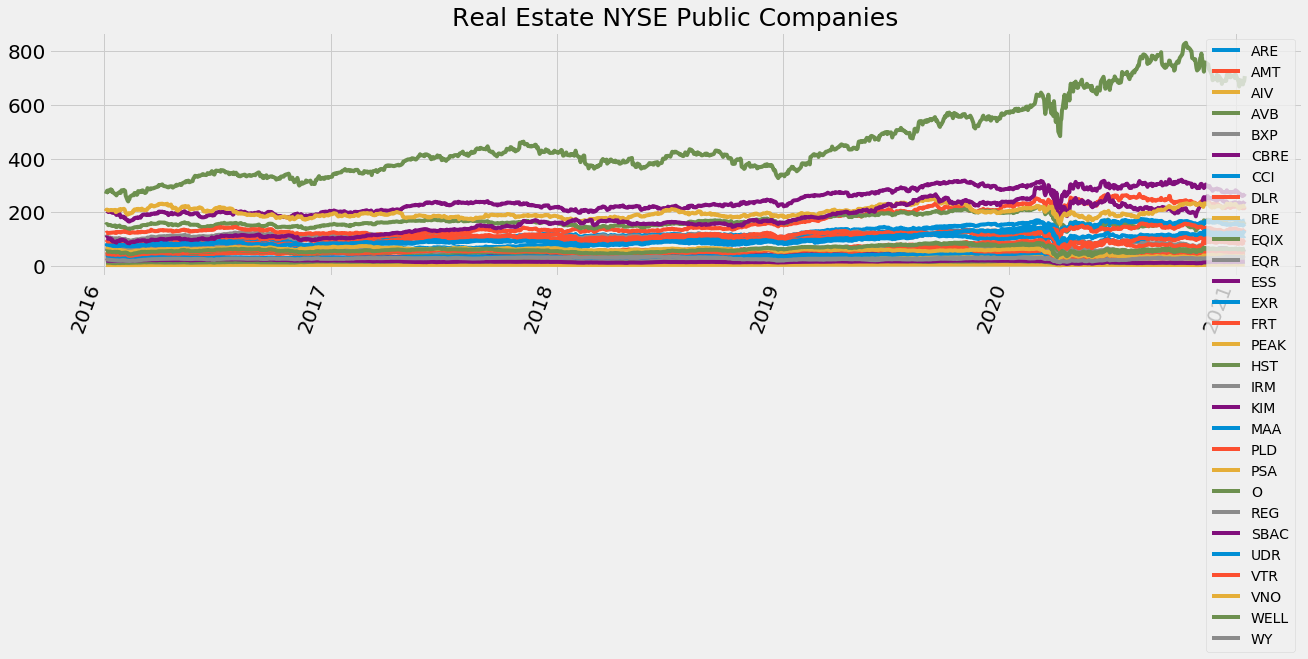

In [27]:
real_state_stocks.plot.line(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Real Estate NYSE Public Companies", fontsize=25);

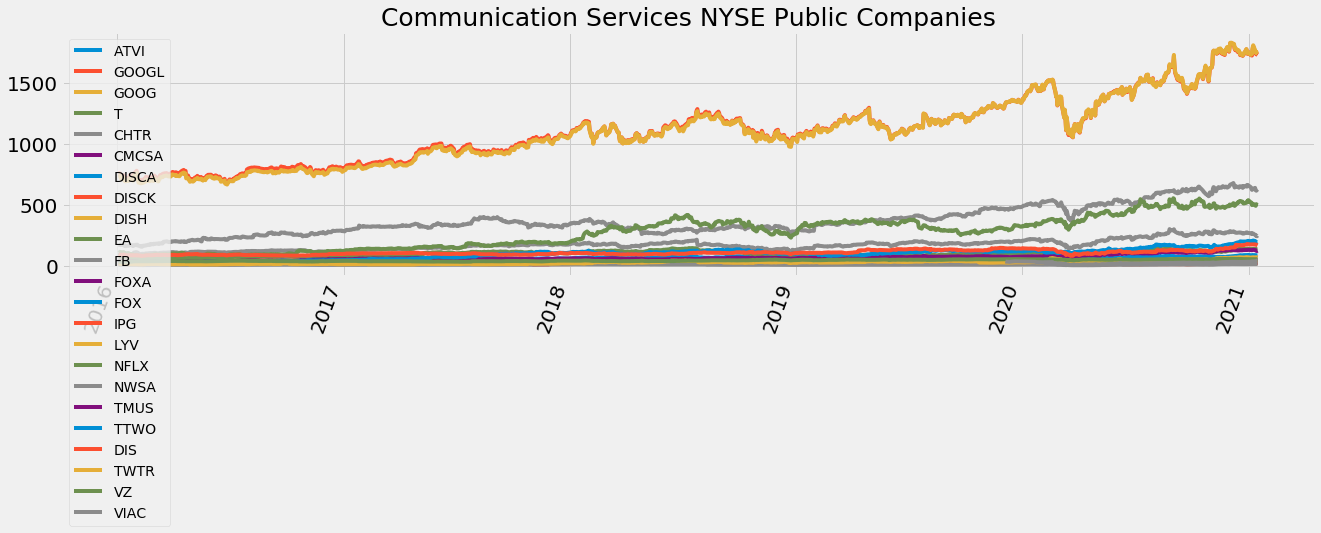

In [29]:
comm_srvc_stocks.plot.line(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Communication Services NYSE Public Companies", fontsize=25);